Title: Predicting the prices of apartments in California using features from a dataset.

This model aims to predict the prices of apartments in California. To build a model that predicts the prices of apartments in California i would be making use of a data set that contains real estate information such as the house age, latitude,longitude,ocean proximity e.t.c.

This csv file contains a data set of real estate informations:

https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

Link to Workthrough video 3 parts: (part 1)https://www.loom.com/share/4bd9189e9bfe45a6bc8fc1943dd607e9?sid=8ca05a85-9b59-4c97-a65b-98f5f58e7fd3

part(2)https://www.loom.com/share/f3fe85072a5148a185dd00da3121190a?sid=a571dc7d-bca9-4c93-8dfb-5f03584f41a2

part(3)https://www.loom.com/share/ff9a9480cfae48adb6ad58fff3ff42e6?sid=1fe606e7-d1a2-4819-86a5-1799a0285565

Link to git:https://github.com/Tomiwajin/House-price-prediction.git

For this project i made use of a XGBRegressor algorithm for my prediction. 


In [346]:
#import csv file

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

df = pd.read_csv('housing.csv')

In [347]:
#Data cleaning 

df.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [348]:
#Check df shape before data cleaning

df.shape

(20640, 10)

In [349]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print(f"Missing Values : \n {missing_values}")

Missing Values : 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [350]:
# Delete rows where 'total_bedrooms' column is missing

df.dropna(subset=['total_bedrooms'], inplace=True)

In [351]:
#Check for duplicate records

duplicates = df.duplicated(subset=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value','ocean_proximity'])

print(sum(duplicates))

0


In [352]:
# Change the column name ‘median_house_value’ to ‘Target’

df.rename(columns={'median_house_value': 'Target'}, inplace=True)

In [353]:
# Change the column 'housing_median_age' to 'House_Age'
df.rename(columns={'housing_median_age': 'House_Age'}, inplace=True)

In [354]:
# Change the column 'total_rooms' to 'TotalRoomsInBlock'
df.rename(columns={'total_rooms': 'TotalRoomsInBlock'}, inplace=True)

In [355]:
# Change the column 'total_bedrooms' to 'TotalBedroomsInBlock'
df.rename(columns={'total_bedrooms': 'TotalBedroomsInBlock'}, inplace=True)

In [356]:
# Change the column 'population' to 'PopulationInBlock'
df.rename(columns={'population': 'PopulationInBlock'}, inplace=True)

In [357]:
# Change the column 'median_income' to 'MedianIncomeInBlock'
df.rename(columns={'median_income': 'MedianIncomeInBlock'}, inplace=True)

In [358]:
#View changes 
df.head(4)

,longitude,latitude,House_Age,TotalRoomsInBlock,TotalBedroomsInBlock,PopulationInBlock,households,MedianIncomeInBlock,Target,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [359]:
# Check df shape after cleaning
df.shape

(20433, 10)

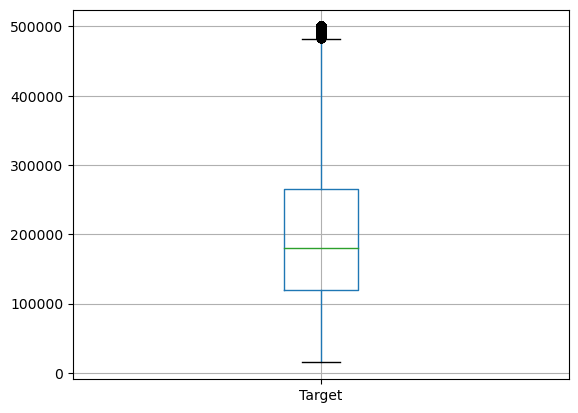

In [360]:
#check for outliers

df.boxplot(column=['Target'])
plt.show()

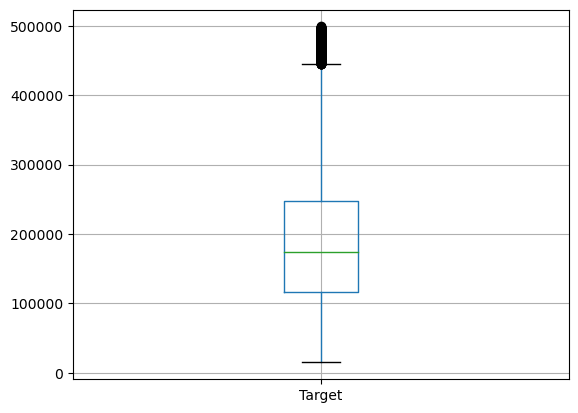

In [361]:
#Remove outliers 

df = df[df['Target'] < 500000]
df.boxplot(column=['Target'])
plt.show()

In [362]:
# Check df shape after cleaning
df.shape

(19448, 10)

In [363]:
#Feature Selection
#Use ANOVA f-test for selecting numerical features
x = df.loc[:, ['longitude', 'latitude', 'House_Age', 'TotalRoomsInBlock', 'TotalBedroomsInBlock', 'PopulationInBlock', 'households','MedianIncomeInBlock']]
y = df.loc[:, 'Target']

In [364]:
np.set_printoptions(suppress = True)
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
print(f'F-Score: {bestFeatures.scores_}')
print(f'P-Values: {bestFeatures.pvalues_}')

F-Score: [1.04978224 1.22671495 1.07555343 1.55504237 1.14090136 1.14329362
 1.20162913 6.39862456]
P-Values: [0.02745301 0.         0.00197396 0.         0.00000008 0.00000005
 0.         0.        ]


All the p values are below 0.05 meaning for each of these variables, there is a statistically significant difference between the two groups.

In [365]:
#Convert categorical variables to numeric 

# Define the mapping for the categories 
ocean_proximity_mapping = {'<1H OCEAN': 0,'INLAND': 1,'NEAR OCEAN': 2,'NEAR BAY': 3,'ISLAND': 4}

In [366]:
# Replace Category values with numeric values
df['ocean_proximity'] = df['ocean_proximity'].replace(ocean_proximity_mapping)

In [367]:
#Use chi-squared test to see the dependance of each categorical feature

x = df.loc[:, ['ocean_proximity']]
y = df.loc[:, 'Target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(f'F-Score: {catFeatures.scores_}')
print(f'P-Values: {catFeatures.pvalues_}')

F-Score: [5047.753381]
P-Values: [0.]


In [369]:
#Change the categorical variables with more than two unique values to dummy variables.
df_withdummies = pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)
df_withdummies.head()

,longitude,latitude,House_Age,TotalRoomsInBlock,TotalBedroomsInBlock,PopulationInBlock,households,MedianIncomeInBlock,Target,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [370]:
#Split the dataset into 80% training dataset and 20% testing dataset. 

# Split the data into X and Y
X = df_withdummies.drop(columns=['Target'])
y = df_withdummies['Target']

# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [371]:
#Build model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Evaluate the model

r2 = model_xgb.score(X_test,y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1907573911.228619
Mean Absolute Error: 29623.769440874035
R-squared: 0.792583416420043


In [372]:
model_xgb.predict(X_test)

array([ 80859.43 , 140002.03 , 313042.9  , ..., 309665.9  ,  57250.207,
       125173.586], dtype=float32)

In [373]:
import pickle
pickle.dump(model_xgb, open("model.pkl", "wb"))  

In [374]:
Xgb_model = pickle.load(open('model.pkl', "rb"))
result = Xgb_model.predict(X_test)
print(result)

[ 80859.43  140002.03  313042.9   ... 309665.9    57250.207 125173.586]


In [375]:
#Dump scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [376]:
#Load scaler
scaler = pickle.load(open('scaler.pkl', 'rb'))